In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr


# Load the file into a DataFrame
data = pd.read_csv('csv_files/amz_uk_price_prediction_dataset.csv')



### Part 1: Analyzing Best-Seller Trends Across Product Categories



In [42]:
"""
1. **Crosstab Analysis**:
    - Create a crosstab between the product `category` and the `isBestSeller` status.
    
    - Are there categories where being a best-seller is more prevalent? 
    	
    	*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*


2. **Statistical Tests**:
    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    - Compute Cramér's V to understand the strength of association between best-seller status and category.

3. **Visualizations**:
	- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.
"""

"\n1. **Crosstab Analysis**:\n    - Create a crosstab between the product `category` and the `isBestSeller` status.\n    \n    - Are there categories where being a best-seller is more prevalent? \n    \t\n    \t*Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.*\n\n\n2. **Statistical Tests**:\n    - Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.\n    - Compute Cramér's V to understand the strength of association between best-seller status and category.\n\n3. **Visualizations**:\n\t- Visualize the relationship between product categories and the best-seller status using a stacked bar chart.\n"

In [43]:
# Create a crosstab
crosstab = pd.crosstab(data['category'], data['isBestSeller'])

# Add a column for the proportion of best-sellers in each category
crosstab['BestSeller_Proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort the crosstab by the proportion of best-sellers in descending order
sorted_crosstab = crosstab.sort_values(by='BestSeller_Proportion', ascending=False)

# Display the sorted crosstab
print(sorted_crosstab)

isBestSeller                    False  True  BestSeller_Proportion
category                                                          
Grocery                          9008   556               0.058135
Smart Home Security & Lighting     98     6               0.057692
Health & Personal Care           9017   552               0.057686
Mobile Phone Accessories          248    11               0.042471
Power & Hand Tools               8353   306               0.035339
...                               ...   ...                    ...
Power Supplies                    247     0               0.000000
Ski Helmets                       254     0               0.000000
Ski Goggles                       256     0               0.000000
Snowboard Boots                  1449     0               0.000000
eBook Readers & Accessories       246     0               0.000000

[296 rows x 3 columns]


In [44]:

# Perform the Chi-square test
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])

# Compute Cramér's V
n = crosstab.values.sum()  # Total number of observations
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape[0], crosstab.shape[1]) - 1)))

# Print the results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Cramér's V: {cramers_v}")

Chi-square statistic: 36540.20270061387
P-value: 0.0
Degrees of freedom: 295
Cramér's V: 0.08646706664522864


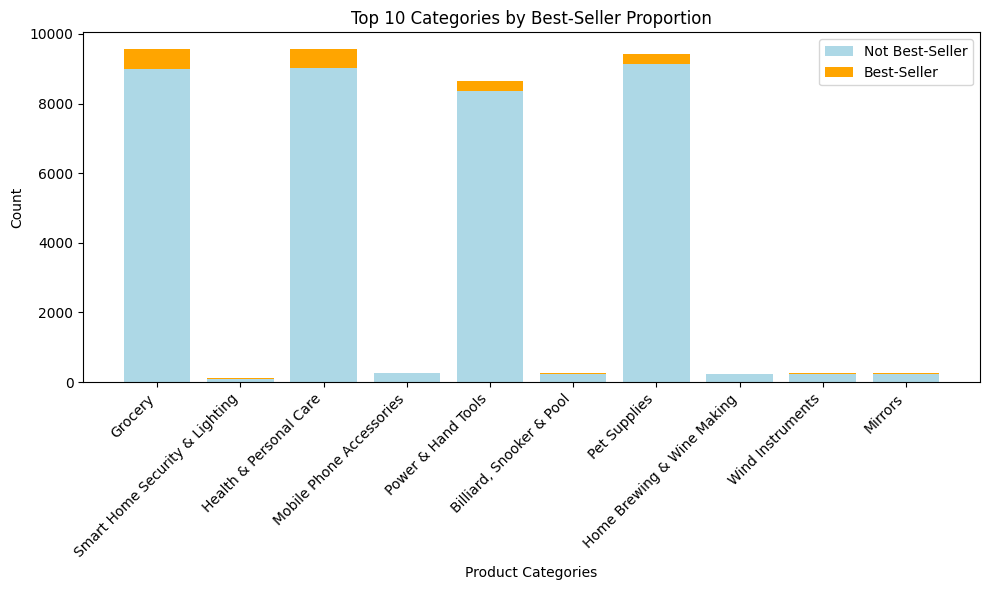

In [45]:


# Select the top 10 categories with the highest proportion of best-sellers
top_categories = sorted_crosstab.head(10)

# Create a stacked bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_categories.index, top_categories[False], label='Not Best-Seller', color='lightblue')
plt.bar(top_categories.index, top_categories[True], bottom=top_categories[False], label='Best-Seller', color='orange')

# Add labels and title
plt.xlabel('Product Categories')
plt.ylabel('Count')
plt.title('Top 10 Categories by Best-Seller Proportion')
plt.xticks(rotation=45, ha='right')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

### Part 2: Exploring Product Prices and Ratings Across Categories and Brands



1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.

2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.

3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.



In [46]:
"""
1. **Violin Plots**:
    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.
    - Which product category tends to have the highest median price? Don't filter here by top categories.
"""

"\n1. **Violin Plots**:\n    - Use a violin plot to visualize the distribution of `price` across different product `categories`. Filter out the top 20 categories based on count for better visualization.\n    - Which product category tends to have the highest median price? Don't filter here by top categories.\n"

C:\Users\modri\AppData\Local\Temp\ipykernel_4368\129588400.py:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='category', y='price', data=filtered_data, scale='width', inner='quartile')


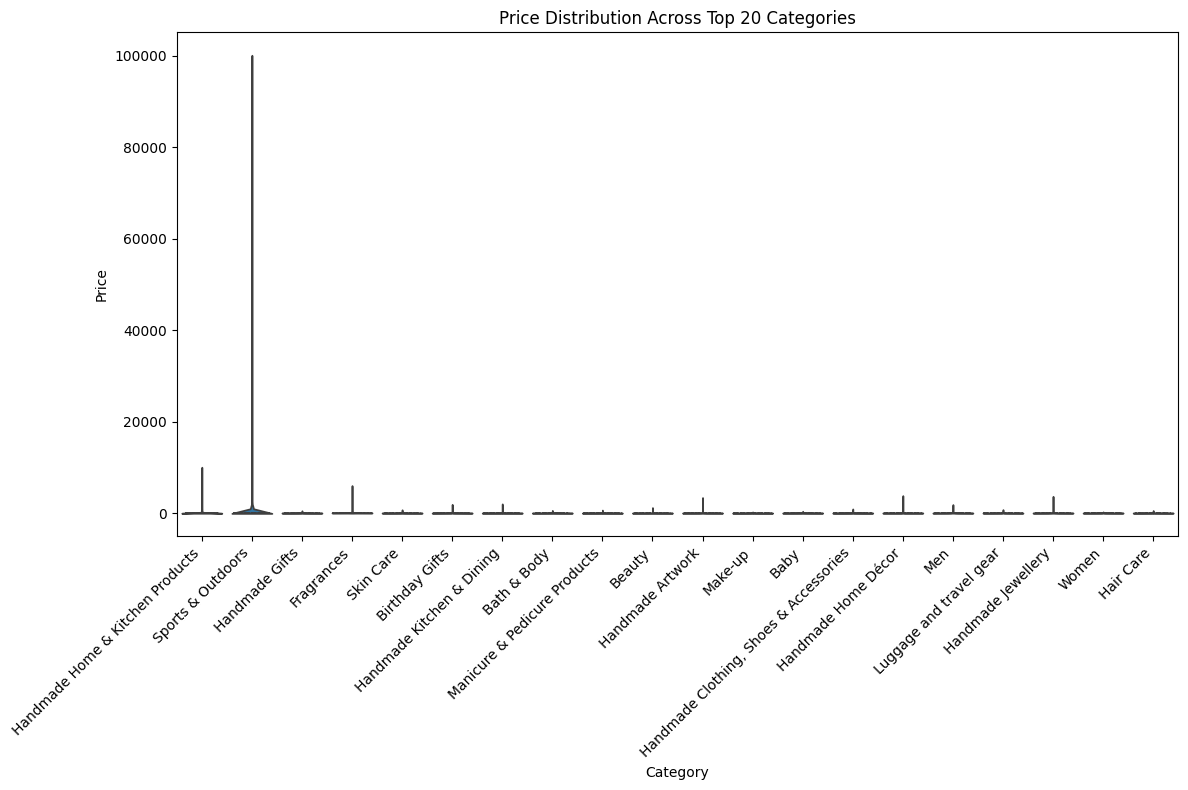

In [47]:
# Filter the top 20 categories based on count
top_20_categories = data['category'].value_counts().head(20).index
filtered_data = data[data['category'].isin(top_20_categories)]

# Create a violin plot for the top 20 categories
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=filtered_data, scale='width', inner='quartile')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Categories')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

C:\Users\modri\AppData\Local\Temp\ipykernel_4368\771290374.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='category', y='price', data=top_20_categories_filtered, scale='width', inner='quartile')


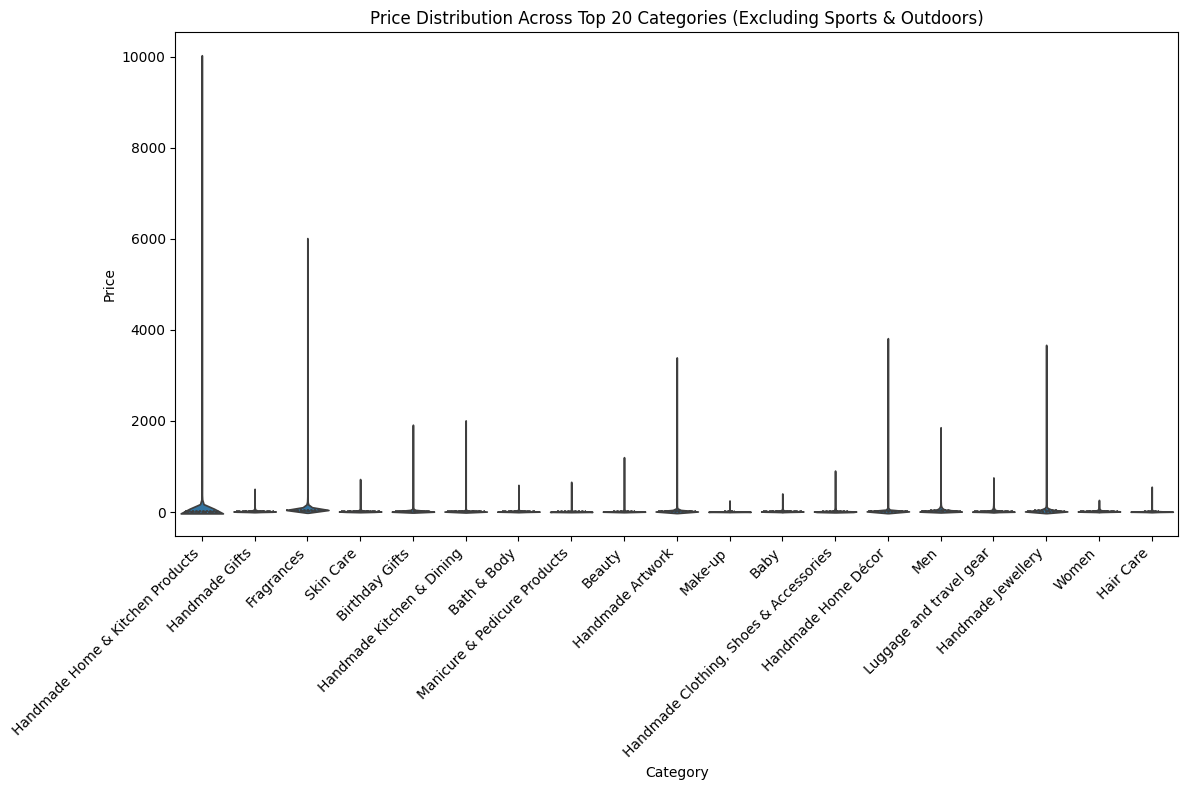

In [48]:
# Filter the top 20 categories based on count


# Create a violin plot for the top 20 categories excluding 'Sports & Outdoors'
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=top_20_categories_filtered, scale='width', inner='quartile')
plt.xticks(rotation=45, ha='right')
plt.title('Price Distribution Across Top 20 Categories (Excluding Sports & Outdoors)')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

C:\Users\modri\AppData\Local\Temp\ipykernel_4368\2617771329.py:6: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='category', y='price', data=sports_outdoors_data, scale='width', inner='quartile')


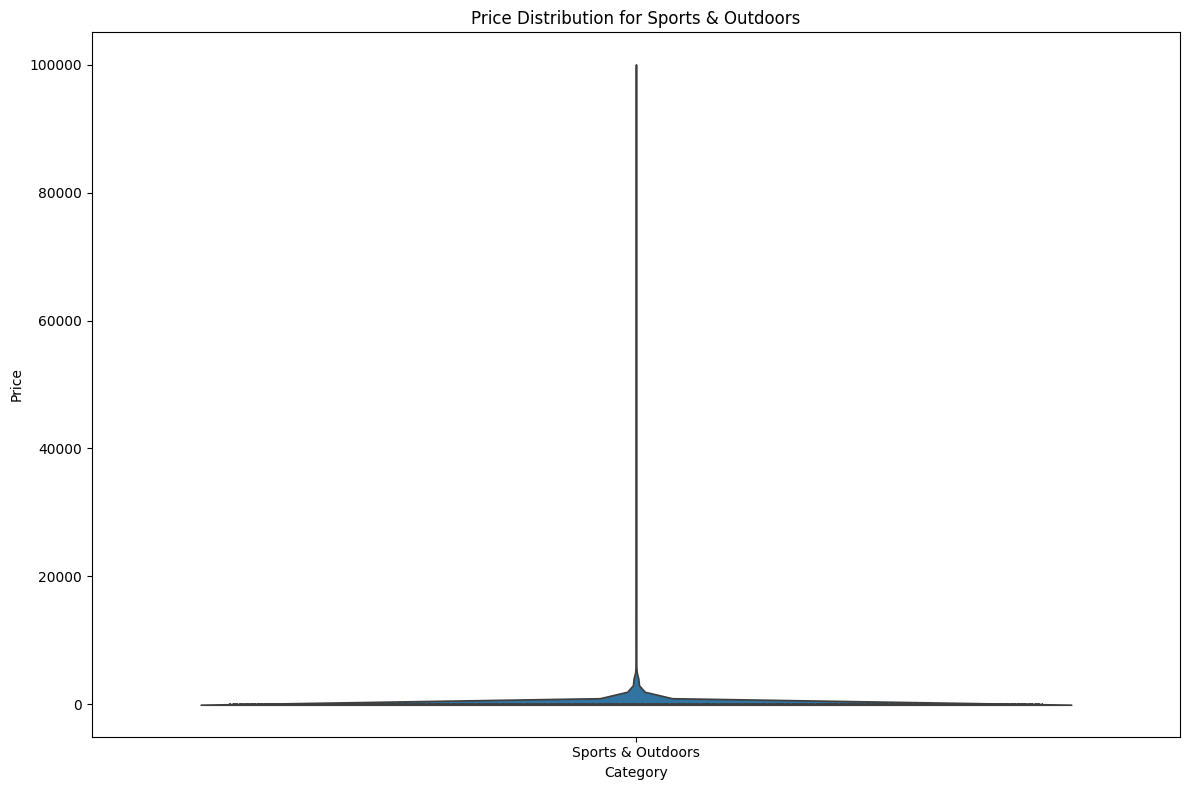

In [49]:


# Filter data for the "Sports & Outdoors" category
sports_outdoors_data = data[data['category'] == 'Sports & Outdoors']

# Create a violin plot for the "Sports & Outdoors" category
plt.figure(figsize=(12, 8))
sns.violinplot(x='category', y='price', data=sports_outdoors_data, scale='width', inner='quartile')

# Add labels and title
plt.title('Price Distribution for Sports & Outdoors')
plt.xlabel('Category')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

In [50]:
# Calculate the median price for each category
median_prices = data.groupby('category')['price'].median()

# Find the category with the highest median price
highest_median_price_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"The category with the highest median price is '{highest_median_price_category}' with a median price of {highest_median_price:.2f}.")

The category with the highest median price is 'Laptops' with a median price of 1042.72.


In [51]:
"""
2. **Bar Charts**:
    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
    - Which product category commands the highest average price? Don't filter here by top categories.
"""

"\n2. **Bar Charts**:\n    - Create a bar chart comparing the average price of products for the top 10 product categories (based on count).\n    - Which product category commands the highest average price? Don't filter here by top categories.\n"

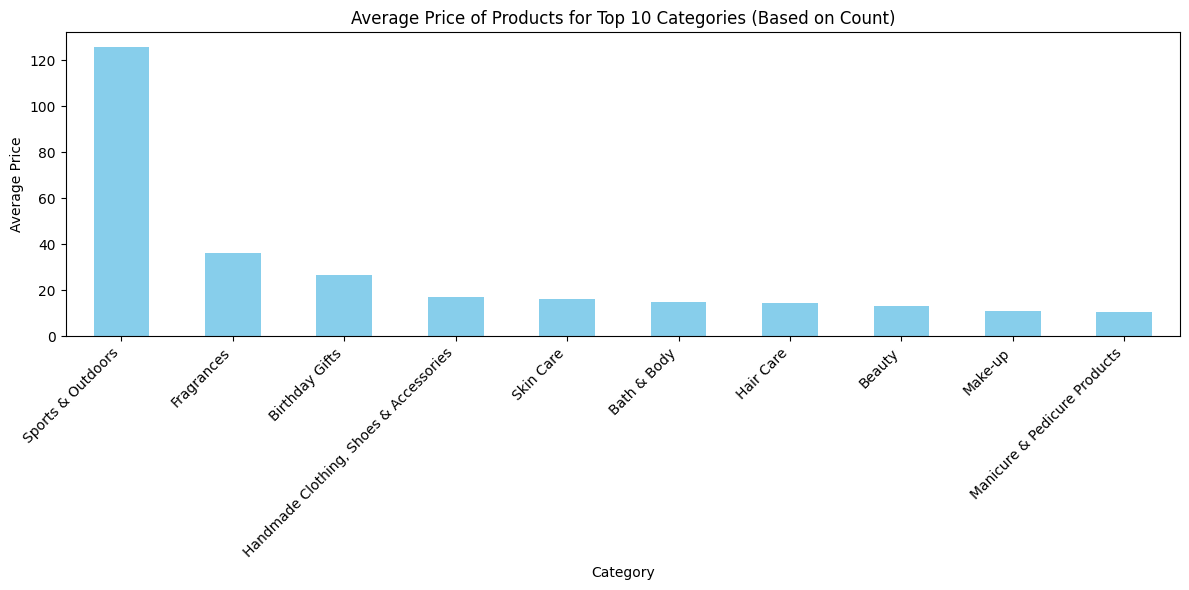

In [52]:
# Calculate the average price for the top 10 product categories based on count
top_10_avg_prices = data.groupby('category')['price'].mean().loc[top_20_categories[:10]]

# Create a bar chart
plt.figure(figsize=(12, 6))
top_10_avg_prices.sort_values(ascending=False).plot(kind='bar', color='skyblue')

# Add labels and title
plt.title('Average Price of Products for Top 10 Categories (Based on Count)')
plt.xlabel('Category')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [53]:
# Calculate the average price for each category
average_prices = data.groupby('category')['price'].mean()

# Find the category with the highest average price
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"The category with the highest average price is '{highest_avg_price_category}' with an average price of {highest_avg_price:.2f}.")

The category with the highest average price is 'Laptops' with an average price of 1087.99.


In [54]:
"""
3. **Box Plots**:
    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
"""

"\n3. **Box Plots**:\n    - Visualize the distribution of product `ratings` based on their `category` using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.\n    - Which category tends to receive the highest median rating from customers? Don't filter here by top categories.\n"

C:\Users\modri\AppData\Local\Temp\ipykernel_4368\2167039830.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=filtered_top_10_data, palette='Set3')


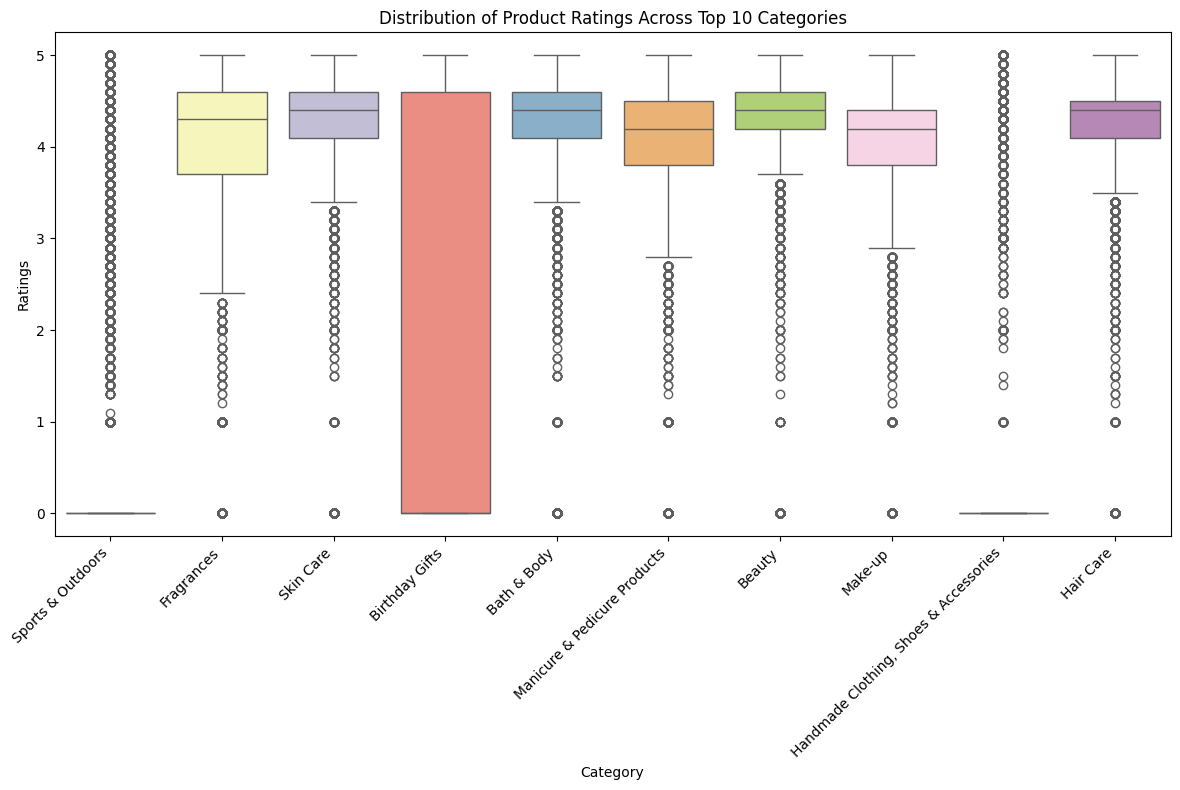

In [55]:
# Filter the top 10 categories based on count
top_10_categories = data['category'].value_counts().head(10).index
filtered_top_10_data = data[data['category'].isin(top_10_categories)]

# Create a box plot for ratings across the top 10 categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='category', y='stars', data=filtered_top_10_data, palette='Set3')

# Add labels and title
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Product Ratings Across Top 10 Categories')
plt.xlabel('Category')
plt.ylabel('Ratings')
plt.tight_layout()
plt.show()

In [56]:
# Calculate the median rating for each category
median_ratings = data.groupby('category')['stars'].median()

# Find the category with the highest median rating
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"The category with the highest median rating is '{highest_median_rating_category}' with a median rating of {highest_median_rating:.1f}.")

The category with the highest median rating is 'Computer Memory' with a median rating of 4.7.


### Part 3: Investigating the Interplay Between Product Prices and Ratings


1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?
	
2. **Visualizations**:
    - Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
    - Use a correlation heatmap to visualize correlations between all numerical variables.
    - Examine if product prices typically follow a normal distribution using a QQ plot. 




1. **Correlation Coefficients**:
    - Calculate the correlation coefficient between `price` and `stars`.
    - Is there a significant correlation between product price and its rating?



In [ ]:


# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(data['price'], data['stars'])

# Print the results
print(f"Correlation coefficient between price and stars: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

Correlation coefficient between price and stars: -0.12
P-value: 0.0000


In [ ]:
### 
#The correlation coefficient between product price and its rating is -0.12, which indicates a weak negative correlation. The p-value is 0.0, suggesting that this correlation is statistically significant. However, the weak magnitude of the correlation implies that the relationship between price and rating is not strong.